In [196]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from importlib import reload
plt=reload(plt)
%matplotlib inline
car_data = pd.read_csv('Cars93.csv')

car_data.head()

,Unnamed: 0,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [251]:
car_data.columns

Index(['Unnamed: 0', 'Manufacturer', 'Model', 'Type', 'Min.Price', 'Price',
       'Max.Price', 'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain',
       'Cylinders', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile',
       'Man.trans.avail', 'Fuel.tank.capacity', 'Passengers', 'Length',
       'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room', 'Luggage.room',
       'Weight', 'Origin', 'Make'],
      dtype='object')

### Create Boxplot To Show Which Manufacturer Has Car With Highest Rev Per Mile

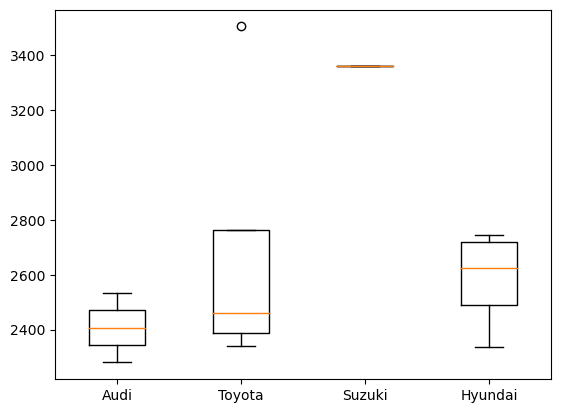

In [249]:
#isolate the revs per mile for each of the 4 manufacturers
audi = car_data.loc[car_data.Manufacturer == 'Audi']['Rev.per.mile']
toyota = car_data.loc[car_data.Manufacturer == 'Toyota']['Rev.per.mile']
suzuki = car_data.loc[car_data.Manufacturer == 'Suzuki']['Rev.per.mile']
hyundai = car_data.loc[car_data.Manufacturer == 'Hyundai']['Rev.per.mile']
#create boxplot
plt.boxplot([audi,toyota,suzuki,hyundai], labels = ('Audi','Toyota', 'Suzuki', 'Hyundai'))
plt.show()
## As you can see from the boxplot below, Toyota has manufactures the car with the highest revs per mile 

### Histogram for MPG in the City compared to MPG on the HIghway

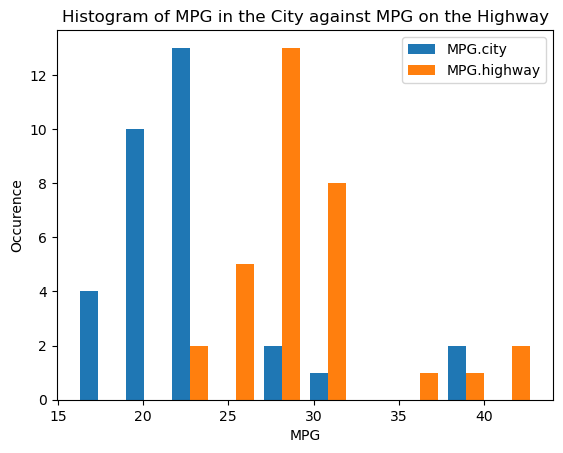

In [202]:
#group data by manufacturer
#get averages of data
manufacturer = car_data.groupby(by=['Manufacturer'])
avg = round(manufacturer.mean())

mpg = pd.DataFrame({'MPG.city': avg['MPG.city'],
                    'MPG.highway': avg['MPG.highway'],})
#plot histogram with both MPG.city an MPG.highway
plt.hist(mpg)
#create legend
plt.legend(['MPG.city','MPG.highway'])
#give chart a title
plt.title('Histogram of MPG in the City against MPG on the Highway')
#label axis
plt.xlabel("MPG")
plt.ylabel("Occurence")
plt.show()
## Looking at the histogram below you can see that overal it is more fuel efficient to drive in the city. 

### Lineplot showing relationship between wheelbase and turning circle

/Applications/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Turn.circle', ylabel='Wheelbase'>

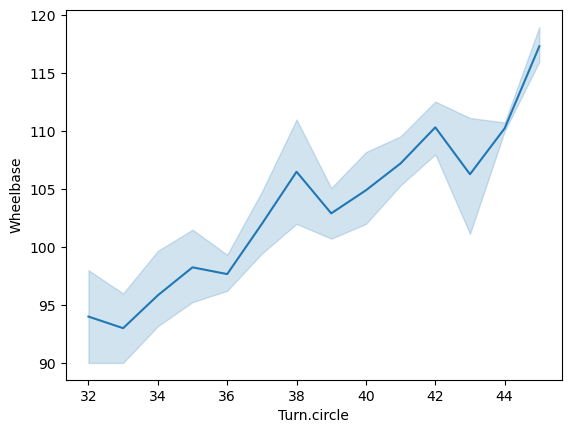

In [218]:
# assign x and y axis values 
y = car_data['Wheelbase']
x = car_data['Turn.circle']
#plot line plot 
sns.lineplot(x, y )
# As you can see as wheelbase increases so does the turning circle of the vehicle. 

### Bar Plot Comparing Horsepower for each Car Type

<AxesSubplot:xlabel='Type', ylabel='Horsepower'>

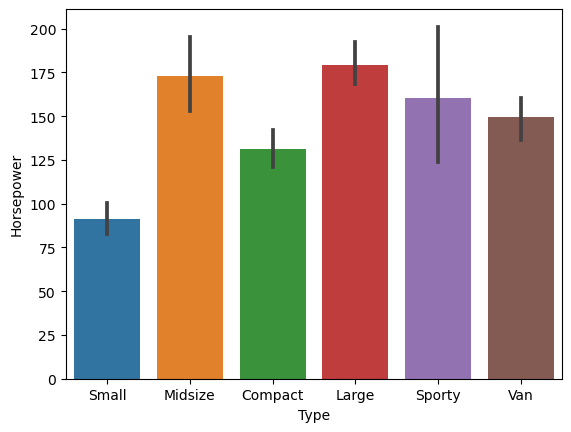

In [247]:
#create barplot to compare car size to average horsepower
sns.barplot(data=car_data, x = 'Type', y = 'Horsepower')
#Looking at the graph you can see that as expected smaller cars have less horsepower than larger car types. However, 
#you can see that having a large car over a midsize car doesn't necessarily mean more horespower, neither does having
#a sporty car, although there are a few sporty cars that have very high horespower, around 200, the average horsepower
#for a sporty car is around 160, they are however lightweight which would mean they would be faster than the large cars. 

### A Pie Chart to see the most popular engine size

array([<AxesSubplot:ylabel='Unnamed: 0'>], dtype=object)

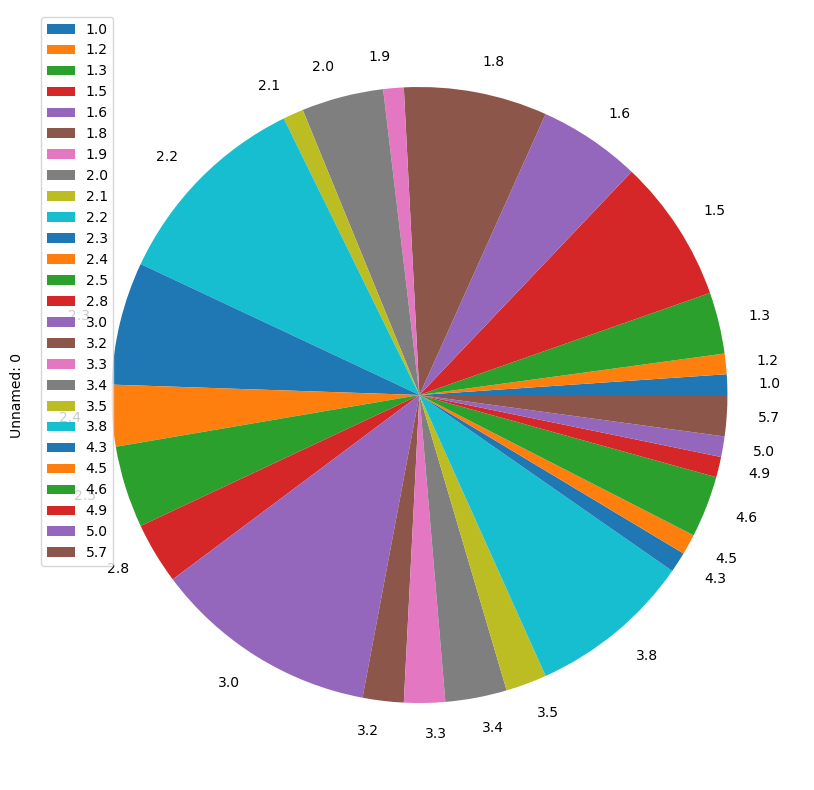

In [272]:
#group data by engine size
engine_size = car_data.groupby(by = ['EngineSize'])
#get count of each different engine size 
engine_size_count = engine_size.count()
#plot as pie chart 
engine_size_count = pd.DataFrame(engine_size_count.iloc[:,0])
engine_size_count.plot.pie(subplots = True, figsize = (11,10))
#The most popular engine size is 3.0 litres 